## Calculate Interpretability Data!

## Prep for analysis

In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

import sys
sys.path.append('/glade/work/kjmayer/research/catalyst/ENSOvsMJO/utils/')
# sys.path.append('/glade/u/home/wchapman/ENSOvsMJO/utils/')
from exp_hp import get_hp

import matplotlib as mpl
import matplotlib.pyplot as plt

plt.rc('text',usetex=True)
plt.rcParams['font.family']='sans-serif'
plt.rcParams['font.sans-serif']=['Verdana']
plt.rcParams.update({'font.size': 15})
def adjust_spines(ax, spines):
    for loc, spine in ax.spines.items():
        if loc in spines:
            spine.set_position(('outward', 5))
        else:
            spine.set_color('none')
    if 'left' in spines:
        ax.yaxis.set_ticks_position('left')
    else:
        ax.yaxis.set_ticks([])
    if 'bottom' in spines:
        ax.xaxis.set_ticks_position('bottom')
    else:
            ax.xaxis.set_ticks([])
mpl.rcParams['figure.facecolor'] = 'white'
mpl.rcParams['figure.dpi'] = 150
dpiFig = 300.

### Load data for plotting:

In [2]:
# print(confvsacc.shape) # 5,100
# print(model1_rawpreds.shape)  # 5,11584,2
# print(model_rawpreds.shape)   # 5,11584,2
# print(model2_fracpred.shape)  # 5
# print(model12_fracpred.shape) # 5

In [4]:
EXP_NAME = 'default'
hps = get_hp(EXP_NAME)

LEADS = np.arange(7,31)
AVGS = np.arange(7,32)
SEEDS = np.arange(1,6)

confvsacc_all = np.zeros(shape=(len(LEADS),len(AVGS),len(SEEDS),100))
model1_fracpred_all  = np.zeros(shape=(len(LEADS),len(AVGS),len(SEEDS)))
model2_fracpred_all  = np.zeros(shape=(len(LEADS),len(AVGS),len(SEEDS)))
model12_fracpred_all = np.zeros(shape=(len(LEADS),len(AVGS),len(SEEDS)))

In [5]:
for l,lead in enumerate(LEADS):
    print('LEAD: '+str(lead))
    for a,avg in enumerate(AVGS):
        # print('AVG: '+str(avg))
        ddir_load = '/glade/work/kjmayer/research/catalyst/ENSOvsMJO/data/'

        finame_confvsacc = 'confvsacc_LEAD_'+str(lead)+'_AVG_'+str(avg)+'__00001-00005.npy'
        confvsacc_all[l,a] = np.load(ddir_load+finame_confvsacc)

        # finame_rawpred  = 'model1_rawpred_LEAD_'+str(lead)+'_AVG_'+str(avg)+'__00001-00005.npy'
        # model1_rawpreds = np.load(ddir_load+finame_rawpred)
        # finame_rawpred  = 'model2_rawpred_LEAD_'+str(lead)+'_AVG_'+str(avg)+'__00001-00005.npy'
        # model2_rawpreds = np.load(ddir_load+finame_rawpred)
        # finame_rawpred  = 'model_rawpred_LEAD_'+str(lead)+'_AVG_'+str(avg)+'__00001-00005.npy'
        # model_rawpreds  = np.load(ddir_load+finame_rawpred)

        finame_fracpred  = 'model1_fracpred_LEAD_'+str(lead)+'_AVG_'+str(avg)+'__00001-00005.npy'
        model1_fracpred_all[l,a]  = np.load(ddir_load+finame_fracpred)
        finame_fracpred  = 'model2_fracpred_LEAD_'+str(lead)+'_AVG_'+str(avg)+'__00001-00005.npy'
        model2_fracpred_all[l,a]  = np.load(ddir_load+finame_fracpred)
        finame_fracpred  = 'model12_fracpred_LEAD_'+str(lead)+'_AVG_'+str(avg)+'__00001-00005.npy'
        model12_fracpred_all[l,a] = np.load(ddir_load+finame_fracpred)


LEAD: 7
LEAD: 8
LEAD: 9
LEAD: 10
LEAD: 11
LEAD: 12
LEAD: 13
LEAD: 14
LEAD: 15
LEAD: 16
LEAD: 17
LEAD: 18
LEAD: 19
LEAD: 20
LEAD: 21
LEAD: 22
LEAD: 23
LEAD: 24
LEAD: 25
LEAD: 26
LEAD: 27
LEAD: 28
LEAD: 29
LEAD: 30


In [6]:
confvsacc_all        = np.mean(confvsacc_all,axis=2)
model1_fracpred_avg  = np.mean(model1_fracpred_all,axis=2)
model2_fracpred_avg  = np.mean(model2_fracpred_all,axis=2)
model12_fracpred_avg = np.mean(model12_fracpred_all,axis=2)

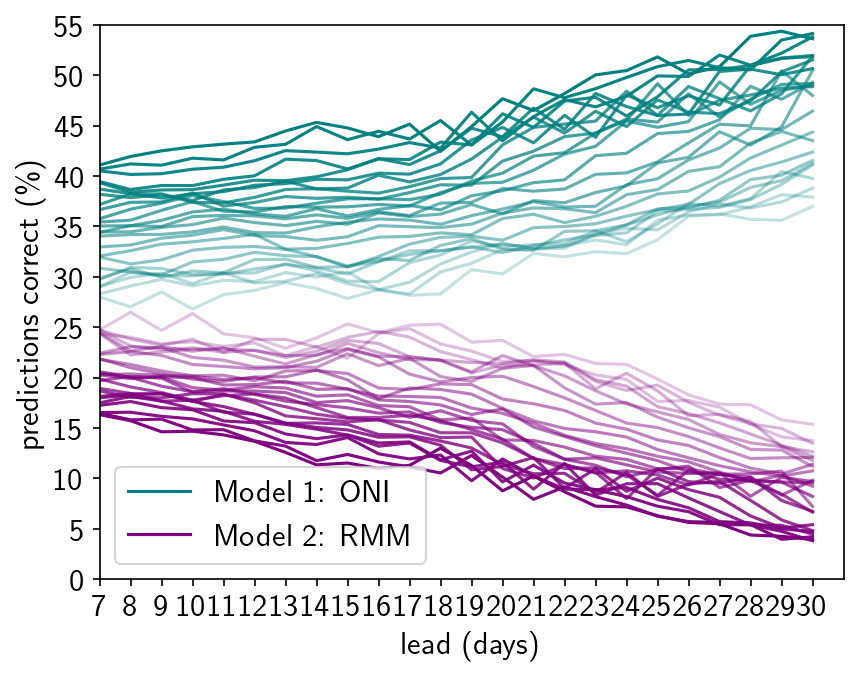

In [12]:
for a,avg in enumerate(AVGS):
    if avg == AVGS[-1]:
        plt.plot(model1_fracpred_avg[:,a]*100,'teal',alpha=avg/AVGS[-1],label='Model 1: ONI')
        plt.plot(model2_fracpred_avg[:,a]*100,'purple',alpha=avg/AVGS[-1],label='Model 2: RMM')
    else:
        plt.plot(model1_fracpred_avg[:,a]*100,'teal',alpha=avg/AVGS[-1])
        plt.plot(model2_fracpred_avg[:,a]*100,'purple',alpha=avg/AVGS[-1])
    # plt.plot(model12_fracpred_avg[:,a]*100,'k',alpha=avg/AVGS[-1])
    plt.ylim(0,50)
    plt.yticks(np.arange(0,60,5),np.arange(0,60,5))
    plt.ylabel('predictions correct (\%)')
    plt.xlim(0,len(LEADS))
    plt.xticks(np.arange(0,len(LEADS)),np.arange(LEADS[0],LEADS[-1]+1,1))
    plt.xlabel('lead (days)')
plt.legend()
plt.show()

In [76]:
np.arange(0,28,7)

array([ 0,  7, 14, 21])

In [73]:
np.arange(LEADS[0],LEADS[-1],7)

array([ 7, 14, 21, 28])

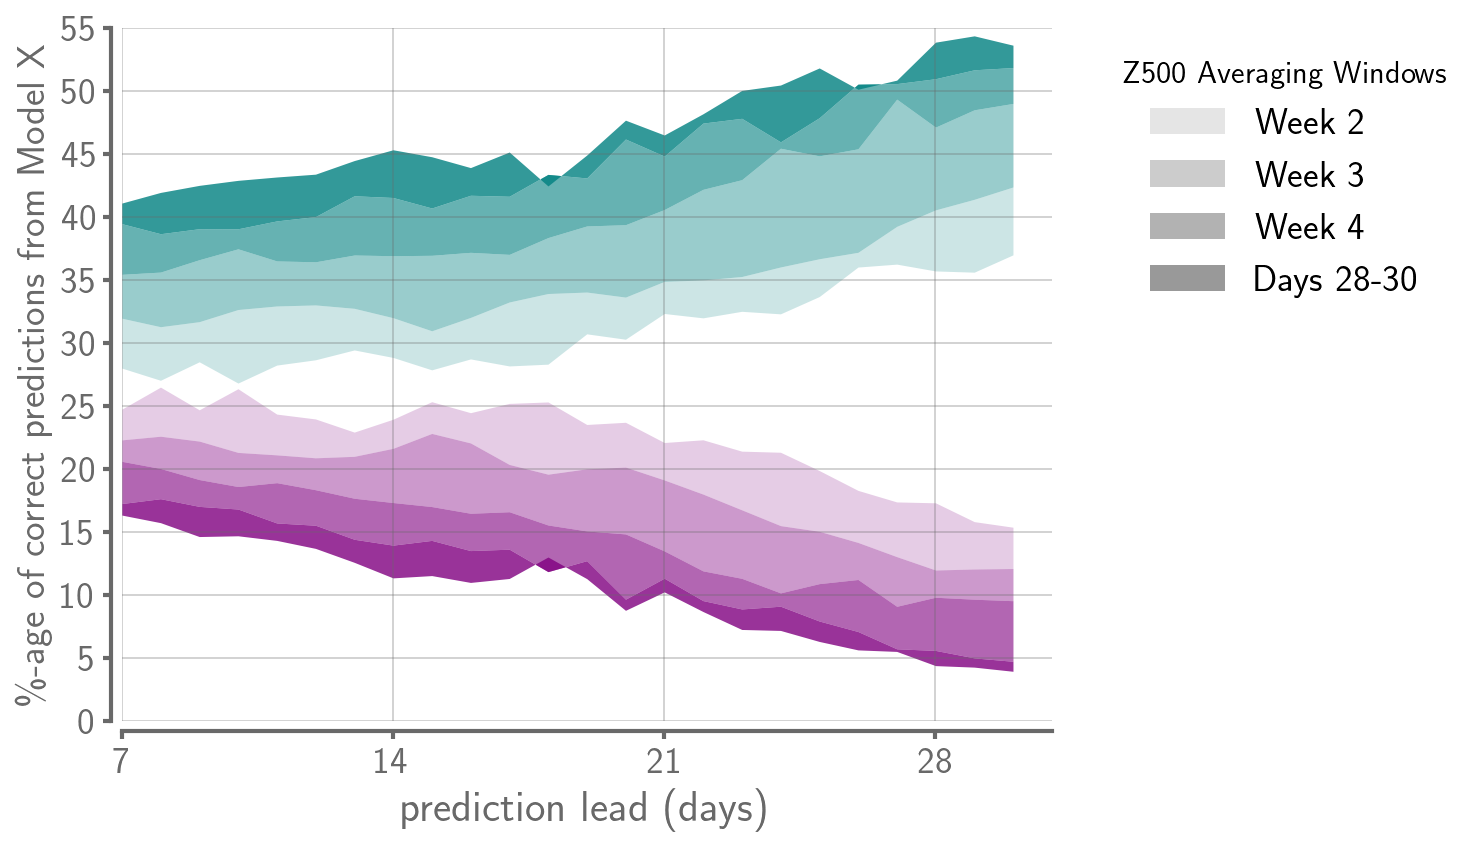

In [112]:
valColor = (141/255,171/255,127/255,1.)
FS = 18
plt.figure(figsize=(8, 6))


#---------- plot loss -------------------
ax = plt.subplot(1,1,1)
adjust_spines(ax, ['left', 'bottom'])
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.spines['left'].set_color('dimgrey')
ax.spines['bottom'].set_color('dimgrey')
ax.spines['left'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.tick_params('both',length=4,width=2,which='major',color='dimgrey')
ax.yaxis.grid(zorder=1,color='dimgrey',alpha=0.35)
ax.xaxis.grid(zorder=1,color='dimgrey',alpha=0.35)

plt.fill_between(x = np.arange(0,len(LEADS)),
                 y1 = model1_fracpred_avg[:,0]*100,
                 y2 = model1_fracpred_avg[:,7]*100,
                color='teal', alpha=0.2,linewidth=0)#,label='Week 2')
plt.fill_between(x = np.arange(0,len(LEADS)),
                 y1 = model1_fracpred_avg[:,7]*100,
                 y2 = model1_fracpred_avg[:,14]*100,
                color='teal', alpha=0.4,linewidth=0)#,label='Week 3')
plt.fill_between(x = np.arange(0,len(LEADS)),
                 y1 = model1_fracpred_avg[:,14]*100,
                 y2 = model1_fracpred_avg[:,21]*100,
                color='teal', alpha=0.6,linewidth=0)#,label='Week 4')
plt.fill_between(x = np.arange(0,len(LEADS)),
                 y1 = model1_fracpred_avg[:,21]*100,
                 y2 = model1_fracpred_avg[:,-1]*100,
                color='teal', alpha=0.8,linewidth=0)#,label='Days 28-31')

plt.fill_between(x = np.arange(0,len(LEADS)),
                 y1 = model2_fracpred_avg[:,0]*100,
                 y2 = model2_fracpred_avg[:,7]*100,
                 color='purple', alpha=0.2,linewidth=0)#,label='Week 2')
plt.fill_between(x = np.arange(0,len(LEADS)),
                 y1 = model2_fracpred_avg[:,7]*100,
                 y2 = model2_fracpred_avg[:,14]*100,
                 color='purple', alpha=0.4,linewidth=0)#,label='Week 3')
plt.fill_between(x = np.arange(0,len(LEADS)),
                 y1 = model2_fracpred_avg[:,14]*100,
                 y2 = model2_fracpred_avg[:,21]*100,
                 color='purple', alpha=0.6,linewidth=0)#,label='Week 4',)
plt.fill_between(x = np.arange(0,len(LEADS)),
                 y1 = model2_fracpred_avg[:,21]*100,
                 y2 = model2_fracpred_avg[:,-1]*100,
                 color='purple', alpha=0.8,linewidth=0)#,label='Days 28-31')

plt.fill_between(x = np.arange(0,len(LEADS)),
                 y1 = np.zeros(shape=(len(LEADS)))+np.nan,
                 y2 = np.zeros(shape=(len(LEADS)))+np.nan,
                 color='grey',label='Week 2', alpha=0.2,linewidth=0)
plt.fill_between(x = np.arange(0,len(LEADS)),
                 y1 = np.zeros(shape=(len(LEADS)))+np.nan,
                 y2 = np.zeros(shape=(len(LEADS)))+np.nan,
                 color='grey',label='Week 3', alpha=0.4,linewidth=0)
plt.fill_between(x = np.arange(0,len(LEADS)),
                 y1 = np.zeros(shape=(len(LEADS)))+np.nan,
                 y2 = np.zeros(shape=(len(LEADS)))+np.nan,
                 color='grey',label='Week 4', alpha=0.6,linewidth=0)
plt.fill_between(x = np.arange(0,len(LEADS)),
                 y1 = np.zeros(shape=(len(LEADS)))+np.nan,
                 y2 = np.zeros(shape=(len(LEADS)))+np.nan,
                 color='grey',label='Days 28-30', alpha=0.8,linewidth=0)

plt.ylim(0,50)
plt.yticks(np.arange(0,60,5),np.arange(0,60,5),fontsize=FS,color='dimgrey')
plt.ylabel('\%-age of correct predictions from Model X',fontsize=FS+1,color='dimgrey')
plt.xlim(0,len(LEADS))
plt.xticks(np.arange(0,28,7),np.arange(LEADS[0],LEADS[-1],7),fontsize=FS,color='dimgrey')
plt.xlabel('prediction lead (days)',fontsize=FS+3,color='dimgrey')
plt.legend(frameon=False, fontsize=FS,ncol=1,bbox_to_anchor=(1.04, 1), loc="upper left", title='Z500 Averaging Windows')
plt.show()